In [1]:
#pylab notebook

# Sistema de comunicações celulares

## Prof. Tarcisio F. Maciel, Dr.-Ing., [maciel@ufc.br](mailto:maciel@ufc.br)

## Objetivo
O objetivo desta atividade é a construção de um programa em Python destinado ao estudo de sistemas de comunicação sem fio.

## Observações
1. Todo o código (nomes de variáveis, funções, comentários) em Python deve ser em inglês.
2. No Python, utilize números complexos para representar coordenadas.
3. Procure usar ```numpy``` como base todo o código de modo que o mesmo funcione para escalares e _arrays_. 
4. Utilize as funções ```db2lin```, ```lin2db```, ```dbm2lin``` e ```lin2dbm``` para realizar conversões entre valores em escala linear e em dB/dBm (e vice-versa).

In [2]:
import numpy as np

def lin2db(x):
    return 10*np.log10(x)

def db2lin(x):
    return 10**(x/10)

def lin2dbm(x):
    return 10*np.log10(x)+30

def dbm2lin(x):
    return 10**(x/10 - 3)

print('1 Watt = ', lin2db(1), 'dBW')
print('0 dBW = ', db2lin(0), 'Watt')
print('1 Watt = ', lin2dbm(1), 'dBm')
print('30 dBm = ', dbm2lin(30), 'Watt')


1 Watt =  0.0 dBW
0 dBW =  1.0 Watt
1 Watt =  30.0 dBm
30 dBm =  1.0 Watt


### Exercício 1
Todo sistema de comunicação envolve um ou mais transmissores que enviam informações a um ou mais receptores. Um sistema celular normalmente tem cada transmissor representado por uma Estação Rádio-Base (ERB) inicialmente equipada com uma única antena, havendo várias dessas ERBs dispostas em diferentes posições e conectadas a um nó central através de um enlace rápido (e.g., fibra ótica) que permite a transferência de dados e informação de controle do/para o nó central. Considere que o nó central e uma ERB estejam ambos localizados na posição $(x, y) = (0, 0)$. Considere que existem ainda outras 3 ERBs distantes de $R = 500$m do nó central nas posições $(R, 0)$, $R\cdot\exp(\jmath\theta)$ e $R\cdot\exp(-\jmath\theta)$, onde $\theta = \dfrac{2\pi}{3}$. Considere que cada ERB cobre uma região de raio $R = 500$~m em torno de sua posição. Modele o posicionamento destas ERBs em seu programa em Python.

Pos ERB: ( 0.0 , 0.0 )
Pos ERB: ( 500.0 , 0.0 )
Pos ERB: ( -249.9999999999999 , 433.01270189221935 )
Pos ERB: ( -249.9999999999999 , -433.01270189221935 )


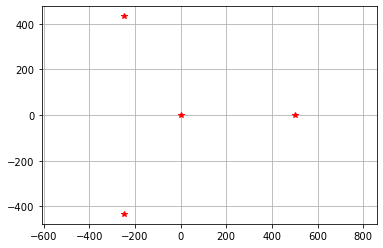

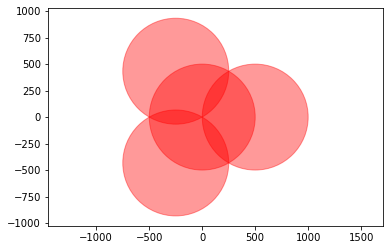

[  0. 500. 500. 500.]


In [3]:
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#Definição de variáveis apontadas pela questão
ang = 2*np.pi/3
r = 500
posERB = np.array([0+0j, r+0j, r*np.exp(1j*ang), r*np.exp(-1j*ang)])

#Impressão na tela das variáveis contidas no vetor posERB (posição das ERBs)
for p in posERB:
    print('Pos ERB: (', np.real(p) ,',', np.imag(p) ,')')

#Utilização da biblioteca matplot para impressão das posições calculadas das ERBs
plt.plot(np.real(posERB), np.imag(posERB), 'r*')
plt.axis('equal')
plt.grid(True)

#Imprime as áreas de atuação das ERBs
fig, ax = plt.subplots()
for p in posERB:
    ax.add_patch(plt.Circle((np.real(p),np.imag(p)), 500, color='r', alpha=0.4))
ax.set_aspect('equal', adjustable='datalim')
ax.plot()
plt.show()

#Imprime valor absoluto dos número complexos gerados, distância entre as ERBs.
print(np.abs(posERB))

### Exercício 2
Como cada ERB cobre uma região circular de raio $R$ em torno de sua posição, qualquer Terminal Móvel (TM) nessa área pode ser servido por (se comunicar com) essa ERB. Não há controle sobre as posições dos TMs e portanto, estas posições são modeladas por variáveis aleatórias uniformemente distribuídas dentro da área de cobertura de cada ERB. Utilizando a função ```numpy.random.rand```, codifique o sorteio da posição aleatória de um TM dentro da área de cobertura de cada ERB do sistema.

Pos ERB [ 1 ]: ( 0.0 , 0.0 )
Pos ERB [ 2 ]: ( 500.0 , 0.0 )
Pos ERB [ 3 ]: ( -249.9999999999999 , 433.01270189221935 )
Pos ERB [ 4 ]: ( -249.9999999999999 , -433.01270189221935 )


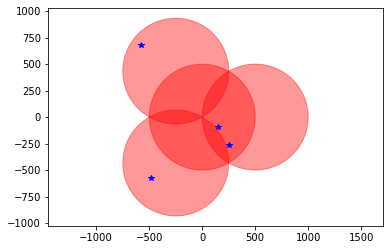

In [4]:
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#Definição de variáveis apontadas pela questão
ang = 2*np.pi/3
r = 500
posERB = np.array([0+0j, r+0j, r*np.exp(1j*ang), r*np.exp(-1j*ang)])

#Impressão na tela das variáveis contidas no vetor posERB (posição das ERBs)
c = 1
for p in posERB:
    print('Pos ERB [',c,']: (', np.real(p) ,',', np.imag(p) ,')')
    c+=1

#Gera posição aleatória
def geraPos (r, c):
    while (True):
        posTM = complex(2*(np.random.rand()-0.5), 2*(np.random.rand()-0.5))
        if np.absolute(posTM)<=1:
            return r*posTM + c

posTMs = np.empty(posERB.shape, dtype=complex)
c = 0
for p in posERB:
    posTMs[c] = geraPos(r, p)
    c+=1
    
#Imprime as áreas de atuação das ERBs
fig, ax = plt.subplots()
for p in posERB:
    ax.add_patch(plt.Circle((np.real(p),np.imag(p)), 500, color='r', alpha=0.4))
ax.set_aspect('equal', adjustable='datalim')
for p in posTMs:
    ax.plot(np.real(p), np.imag(p), 'b*')
plt.show()

### Exercício 3
A comunicação rádio-móvel é afetada por diferentes fenômenos de propagação. Os principais fenômenos modelados são a perda de percurso média em função da distância no caminho entre transmissor e receptor, o sombreamento devido a obstáculos (prédios, morros, etc.) entre transmissor e receptor e o desvanecimento rápido devido a interferências construtivas e destrutivas de réplicas do sinal transmitido que chegam até o receptor por múltiplos percursos distintos.

1. A perda de percurso média ${L}_{i,j}(d_{i,j})$ pode ser calculada como
$$
{L}_{i,j}(d_{i,j}) = 128.1 + 36.7\log_{\text{10}}(d_{i,j}),\quad\text{em dB},
$$
com $d_{i,j}$ é a distância entre os nós $i$ (e.g., uma ERB) e $j$ (e.g., um TM) em km que pode ser calculada usando a função ```np.abs```. Para cada enlace ligando uma ERB $i$ a um TM $j$, calcule e armazene em seu programa o ganho de percurso ${g}_{i,j}$ associado ao enlace lembrando que o ganho é igual ao inverso da perda em escala linear.

2. O sombreamento $\mathcal{X}_{i,j}$ que afeta a comunicação entre os nós $i$ e $j$ também é aleatório, dado que a distribuição dos obstáculos é normalmente desconhecida. O sombreamento é normalmente modelado utilizando uma variável aleatório com distribuição log-normal (normal em dB). Considerando que o desvio padrão do sombreamento é $\sigma_{\mathcal{X}} = 8$~dB, calcule o ganho ${g_{\mathcal{X}}}_{i,j} = 10^{\frac{\mathcal{X}_{i,j}}{10}}$ associado ao sombreamento para cada enlace ligando uma ERM $i$ a um TM $j$. Utilize a função ```randn``` para gerar os valores do sombreamento.

3. O desvanecimento rápido $h_{i,j}$ também é aleatório dados que as múltiplas cópias oriundas de reflexões do sinal transmitido trafegam por percursos de comprimento aleatório. O desvanecimento rápido é normalmente modelado utilizando uma variável aleatória com distribuição de Rayleigh. Se $h_{i,j} = x_{i,j} + y_{i,j}$ representa o desvanecimento Rayleigh se $x_{i,j}$ e $y_{i,j}$ são variáveis aleatórias com distribuição normal e desvio padrão igual a $\frac{1}{\sqrt{2}}$. Para cada enlace ligando uma ERB $i$ a um TM $j$, calcule e armazene em seu programa o ganho ${g_h}_{i,j} = \vert h_{i,j} \vert^2$ associado ao desvanecimento rápido de cada enlace e cujo valor em dB é dado por ${g_H}_{i,j} = 10\log_{\text{10}}(\vert h_{i,j} \vert^2)$.


Pos ERB [ 1 ]: ( 0.0 , 0.0 )
Pos ERB [ 2 ]: ( 500.0 , 0.0 )
Pos ERB [ 3 ]: ( -249.9999999999999 , 433.01270189221935 )
Pos ERB [ 4 ]: ( -249.9999999999999 , -433.01270189221935 )


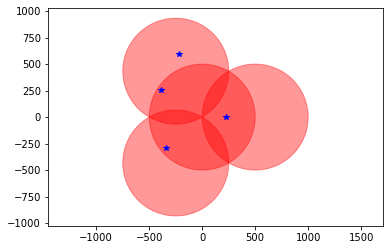

Item 1: 

Distâncias da ERB 1:  [465.06349892 222.48812411 631.03243863 449.33861783] Km.
Distâncias da ERB 2:  [925.93931695 277.61614575 929.6140591  890.83045794] Km.
Distâncias da ERB 3:  [229.75296065 637.43329736 163.48626778 730.61605412] Km.
Distâncias da ERB 4:  [ 699.0723371   644.29105468 1026.49683739  168.33554909] Km.


Perdas em relação à ERB  1 :  [225.99769975 214.24616082 230.86189684 225.44945644] dB.
Perdas em relação à ERB  2 :  [236.97357868 217.77442124 237.03670847 236.35747861] dB.
Perdas em relação à ERB  3 :  [214.75828298 231.02275517 209.33476296 233.19739404] dB.
Perdas em relação à ERB  4 :  [232.4939617  231.19331313 238.61682449 209.80065333] dB.


Ganhos em relação à ERB  1 :  [ 91.81566728  25.71883491 137.03881162  87.53095854] dB.
Ganhos em relação à ERB  2 :  [217.39490925  40.74009421 218.39620139 207.82846265] dB.
Ganhos em relação à ERB  3 :  [ 27.6983544  138.78291481   9.64203482 164.17331175] dB.
Ganhos em relação à ERB  4 :  [155.57829349 14

In [5]:
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#Definição de variáveis apontadas pela questão
ang = 2*np.pi/3
r = 500
posERB = np.array([0+0j, r+0j, r*np.exp(1j*ang), r*np.exp(-1j*ang)])

#Impressão na tela das variáveis contidas no vetor posERB (posição das ERBs)
c = 1
for p in posERB:
    print('Pos ERB [',c,']: (', np.real(p) ,',', np.imag(p) ,')')
    c+=1

#Gera posição aleatória
def geraPos (r, c):
    while (True):
        posTM = complex(2*(np.random.rand()-0.5), 2*(np.random.rand()-0.5))
        if abs(posTM)<=1:
            return r*posTM + c

posTMs = np.empty(posERB.shape, dtype=complex)
c = 0
for p in posERB:
    posTMs[c] = geraPos(r, p)
    c+=1
    
#Imprime as áreas de atuação das ERBs
fig, ax = plt.subplots()
for p in posERB:
    ax.add_patch(plt.Circle((np.real(p),np.imag(p)), 500, color='r', alpha=0.4))
ax.set_aspect('equal', adjustable='datalim')
for p in posTMs:
    ax.plot(np.real(p), np.imag(p), 'b*')
plt.show()

#Item 1
print("Item 1: \n")

#Cálculo da distância
i = 0
j = 0
d = np.zeros(shape=(4, 4))
for i, p in enumerate(posERB):
    for j, t in enumerate(posTMs):
        d[i][j] = np.absolute(p-t)
        j+=1
    i+=1
print("Distâncias da ERB 1: ", d[0], "Km.")
print("Distâncias da ERB 2: ", d[1], "Km.")
print("Distâncias da ERB 3: ", d[2], "Km.")
print("Distâncias da ERB 4: ", d[3], "Km.")
print("\n")

#Cálculo da perda e ganho
perdaM = np.zeros(shape=(4, 4))
ganhoM = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        perdaM[i][j] = 128.1+36.7*np.log10(d[i][j])
        #inverso em decibel
        ganhoM[i][j] = 10*np.log10(10**((d[i][j]-128.1)/36.7))
        j+=1
    i+=1

c=1
for p in perdaM:
    print("Perdas em relação à ERB ",c,": ", p, "dB.")
    c+=1
print("\n")
c=1
for g in ganhoM:
    print("Ganhos em relação à ERB ",c,": ", g, "dB.")
    c+=1
print("\n\n") 

#Item 2
print("Item 2: \n")
#Cálculo do ganho (sombreamento):
ganhoS = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        ganhoS[i][j] = 10**(8*np.random.randn()/10)
        j+=1
    i+=1

for c, p in enumerate(ganhoS):
    print("Sombreamento em relação à ERB ",c+1,": ", p, "dB.")
    c+=1
print("\n\n")

#Item 3
print("Item 3: \n")
#Cálculo do desvanecimento rápido:
desvaR = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        desvaR[i][j] = 10*np.log10(np.power((1/np.sqrt(2))*(np.random.randn()+np.random.randn()), 2))
        j+=1
    i+=1

for c, p in enumerate(ganhoS):
    print("Desvanecimento rápido em relação à ERB ",c+1,": ", p, "dB.")
    c+=1
print("\n")

### Exercício 4
Seja ${P_T}_{i,j} = 43$dBm a potência de transmissão da ERB $i$ para o TM $j$ e ${p_T}_{i,j}$ e seu valor em escala linear. Dados os ganhos ${g}_{i,j}$, $\mathcal{X}_{i,j}$ e $H_{i,j}$ associados aos efeitos propagação descritos anteriormente, a potência ${p_R}_{i,j}$ recebida da ERB $i$ pelo TM $j$ é dada por
$$
{p_R}_{i,j} = {p_T}_{i,j}\cdot {g}_{i,j}\cdot {g_{\mathcal{X}}}_{i,j}\cdot {g_h}_{i,j}.
$$
Para todos enlaces entre uma ERB $i$ e um TM $j$, calcule e armazene a potência recebida.


In [6]:
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#Definição de variáveis apontadas pela questão
ang = 2*np.pi/3
r = 500
posERB = np.array([0+0j, r+0j, r*np.exp(1j*ang), r*np.exp(-1j*ang)])

#Gera posição aleatória
def geraPos (r, c):
    while (True):
        posTM = complex(2*(np.random.rand()-0.5), 2*(np.random.rand()-0.5))
        if abs(posTM)<=1:
            return r*posTM + c

posTMs = np.empty(posERB.shape, dtype=complex)
c = 0
for p in posERB:
    posTMs[c] = geraPos(r, p)
    c+=1

#Cálculo da distância
i = 0
j = 0
d = np.zeros(shape=(4, 4))
for i, p in enumerate(posERB):
    for j, t in enumerate(posTMs):
        d[i][j] = np.absolute(p-t)
        j+=1
    i+=1

#Cálculo da perda e ganho
perdaM = np.zeros(shape=(4, 4))
ganhoM = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        perdaM[i][j] = 128.1+36.7*np.log10(d[i][j])
        #inverso em decibel
        ganhoM[i][j] = 10*np.log10(10**((d[i][j]-128.1)/36.7))
        j+=1
    i+=1

#Cálculo do ganho (sombreamento):
ganhoS = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        ganhoS[i][j] = 10**(8*np.random.randn()/10)
        j+=1
    i+=1

#Cálculo do desvanecimento rápido:
desvaR = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        desvaR[i][j] = 10*np.log10(np.power((1/np.sqrt(2))*(np.random.randn()+np.random.randn()), 2))
        j+=1
    i+=1

#Potência Recebida:
potTrans = 43
potR = np.zeros(shape=(4, 4))
for i in range(4):
    for j in range(4):
        potR[i][j] = dbm2lin(potTrans)*db2lin(desvaR[i][j])*db2lin(ganhoS[i][j])*db2lin(ganhoM[i][j])
        j+=1
    i+=1

print("\n")
for c, p in enumerate(potR):
    print("Potência recebida em relação à ERB ",c+1,": ", p, "dB.")
    c+=1
print("\n")



Potência recebida em relação à ERB  1 :  [7.80739592e+10 4.01583085e+12 6.71880183e+19 1.62211073e+18] dB.
Potência recebida em relação à ERB  2 :  [4.11845116e+20 3.30866762e+10 4.05972438e+18 4.26135082e+27] dB.
Potência recebida em relação à ERB  3 :  [5.07139487e+10 9.14305674e+13 8.79780186e+09 5.21518436e+26] dB.
Potência recebida em relação à ERB  4 :  [6.66760007e+08 5.54784925e+25 5.90855156e+29 4.50154487e+03] dB.




### Exercício 5
Considerando que a comunicação de interesse se dá entre a ERB $i$ e o TM $j$ quando $i = j$ e considerando que todas as ERBs utilizam o mesmo canal ao mesmo tempo, o sinal transmitido pela ERB $i$ sofrerá interferência do sinal transmitido pela ERB $k, \forall k \neq i$. Seja $P_N = -116$~dBm a potência de ruído média cujo valor em escala linear é denotado por $p_N$. Considerando que cada ERB $i$ serve um TM $i$, a Relação Sinal Ruído-mais-Interferência (SINR) $\gamma_{i,i}$ do enlace é dada por
$$
\gamma_{i,i} = \frac{{p_R}_{i,i}}{\sum\limits_{j \neq i}{p_R}_{j,i} + p_N}.
$$
Para cada enlace entre uma ERB $i$ e seu TM $i$, calcule e armazene o valor de $\gamma_{i,i}$.

In [7]:
import numpy as np

SINR = np.zeros(shape=(4, 4))
Pn = dbm2lin(-116)
pr = 0

for i, p in enumerate(posERB):
    for j, t in enumerate(posTMs):
        if i!=j:
            pr = pr + potR[i][j]
    SINR[i] = potR[i][i]/(pr + Pn)

for i in range(0,4):
    print("Relação Sinal Ruído-mais-Interferência ERB [", i+1, "]: ", SINR[i][0], "dB.")

Relação Sinal Ruído-mais-Interferência ERB [ 1 ]:  1.1346288083241903e-09 dB.
Relação Sinal Ruído-mais-Interferência ERB [ 2 ]:  7.764362482962644e-18 dB.
Relação Sinal Ruído-mais-Interferência ERB [ 3 ]:  1.8394399893609243e-18 dB.
Relação Sinal Ruído-mais-Interferência ERB [ 4 ]:  7.55681375587969e-27 dB.


### Exercício 6
A SINR mede a qualidade de um enlace de comunicação. A fim de caracterizar estatisticamente a qualidade média dos enlaces envolvidos no sistema, é necessário medir os valores de SINR associados a diversas posições aleatórias dos usuários que também depende das características aleatórias do canal. Considere que o programa desenvolvido até agora representa um experimento cuja saída são os valores de SINR associados aos enlaces envolvidos no sistema. Adapte seu programa de modo a realizar $I = 5000$ repetições do experimento, onde em cada experimento a posição dos TMs e os efeitos de propagação são aleatórios, mas caracterizados pelos valores fornecidos anteriormente. Salve os valores de SINR dos enlances nas colunas de uma matriz e ao final, plote a Função Distribuição de Probabilidade Acumulada (CDF) dos valores de SINR para os enlaces associados a cada ERB $i$.

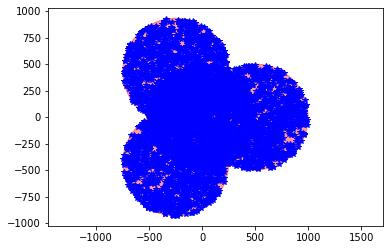

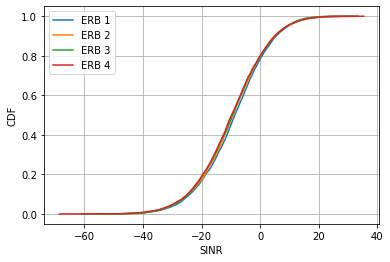

In [8]:
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from random import randint

#Funções auxiliares
def lin2db(x):
    return 10*np.log10(x)

def db2lin(x):
    return 10**(x/10)

def lin2dbm(x):
    return 10*np.log10(x)+30

def dbm2lin(x):
    return 10**(x/10 - 3)

#Definição de variáveis apontadas pela questão
ang = 2*np.pi/3
r = 500
posERB = np.array([0+0j, r+0j, r*np.exp(1j*ang), r*np.exp(-1j*ang)])
potTrans = dbm2lin(43)
Pn = dbm2lin(-116)

#Criação de funções genéricas
def geraPos (r, c):
    while (True):
        posTM = complex(2*(np.random.rand()-0.5), 2*(np.random.rand()-0.5))
        if np.absolute(posTM)<=1:
            return r*posTM + c

def dist(posTMs,posERB): 
    i = posERB.size
    j = posTMs.size
    d = np.zeros(shape=(i,j))
    for i, p in enumerate(posERB):
        for j, t in enumerate(posTMs):
            d[i][j] = np.maximum(35, np.abs(p-t))
            j+=1
        i+=1
    return np.real(d)

def calcGanho(posERB,posTMs):
    d = dist(posERB,posTMs)
    return db2lin(128.1 + 3.67*np.log10(d/1000))

def sombreamento(posERB,posTMs,sigma=8):
    return db2lin(sigma*np.random.randn(posERB.size,posTMs.size))

def desvRap(posERB):
    i = posERB.size
    return np.real(np.abs((1/np.sqrt(0.5))*(np.random.randn(i,i)+1j*np.random.randn(i,i)))**2)

def potR(posERB,posTMs,potTrans):
    perdaM = np.power(calcGanho(posERB,posTMs),-1)
    shadow = sombreamento(posERB,posTMs,sigma=8)
    desvR = desvRap(posERB)
    return potTrans*perdaM*shadow*desvR

def potR_dbm(potR):
    return lin2dbm(potR)

def sinr(potR, Pn):
    i = np.diagonal(potR)
    j = np.sum(potR, axis=1) - i
    if np.sum(j == 0):
        print ('Erro!')
    return i/(j+Pn)

def sinr_db(sinr):
    return lin2db(sinr)

#Número de links
links = posERB.size
#Número de repetições e TMs
I = 5000
TM = 5000
#Definição dos resultados
sinr_t = np.zeros((I,links), dtype=float)

for k in range(0,I):
    #Cálculo da posição
    posTMs = np.zeros(posERB.size, dtype=complex)
    for i in range(0,posERB.size):
        posTMs[i] = geraPos(r, posERB[randint(0,3)])
        i+=1
        #Ganho
        #G = calcGanho(posERB,posTMs)
        #Sombreamento
        #S = sombreamento(posERB,posTMs,sigma=8)
        #Desvanecimento
        #D = desvRap(posERB,posTMs)
        #Potência Recebida
        P = potR(posERB,posTMs,potTrans)
        #Sinal Ruído-mais-Interferência
        sinr_t[k,:] = sinr(P, Pn)

posTMs = np.zeros(TM, dtype=complex)
for i in range(0,TM):
    posTMs[i] = geraPos(r, posERB[randint(0,3)])
    i+=1
    
#Imprime as áreas de atuação das ERBs
fig, ax = plt.subplots()
for p in posERB:
    ax.add_patch(plt.Circle((np.real(p),np.imag(p)), 500, color='r', alpha=0.4))
ax.set_aspect('equal', adjustable='datalim')
for p in posTMs:
    ax.plot(np.real(p), np.imag(p), 'b*')
plt.show()

#CDF
sinr2db = lin2db(sinr_t)
X = np.zeros((201, 4))
Y = np.zeros((201, 4))
for i in range(0, posERB.size):
    data = sinr2db[:, i]
    (y, x) = np.histogram(data, bins=201, density=True)
    X[:, i] = (x[1:] + x[:-1]) / 2;
    y = np.cumsum(y)
    y = y/y[-1]
    Y[:, i] = y

plt.plot(X, Y)
plt.xlabel('SINR')
plt.ylabel('CDF')
plt.legend(['ERB 1', 'ERB 2', 'ERB 3', 'ERB 4'])
plt.grid(True)
plt.show()

## Referências
1. F. R. P. Cavalcanti, T. F. Maciel, W. da C. Freitas Jr., e Y. C. B. Silva, Comunicação Móvel Celular, 1a ed., LTC, Abril, 2018.
2. T. S. Rappaport, Wireless communications: principles and practice, 1st ed., ser. Prentice Hall Communications Engineering
and Emerging Technologies. Prentice Hall, Jul. 1999.
3. S. Saunders and A. Aragón-Zavala, Antennas and propagation for wireless communication systems, 2nd ed. John Wiley &
Sons, May 2007.